In [1]:
import pandas as pd
data_working = pd.read_csv('../raw_data/working.csv')

In [2]:
def clean(text):
    text= ''.join(word for word in text if not word.isdigit())
    return len(text)
data_working['len_text'] = data_working['text'].apply(clean)


In [3]:
data_working['len_title'] = data_working['title'].apply(clean)

c:\users\liamc\.venvs\lewagon\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 30000.0)

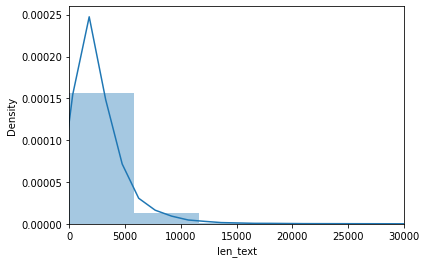

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

lenght = data_working['len_text']

sns.distplot(lenght);
plt.xlim((0,30000))

In [6]:
lenght_2 = data_working['len_title']

c:\users\liamc\.venvs\lewagon\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


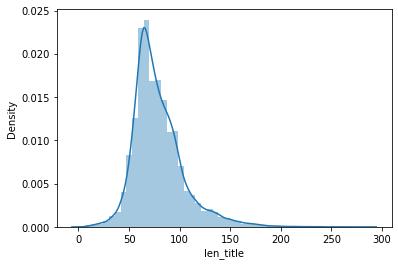

In [8]:
sns.distplot(lenght_2);